In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error as MAE
df_data = pd.read_csv("RyoriCO2.csv")

In [3]:
col2=df_data[df_data.columns[2]]
raw_co2=pd.to_numeric(col2, errors='coerce')
pp_co2=raw_co2.interpolate()
df_data[pp_co2.isna()]

,年,月,二酸化炭素濃度の月平均値(綾里)[ppm]


In [4]:
train_data = pp_co2[0:12*30]
test_data = pp_co2[len(train_data):]

In [16]:
p_value=[]
mae_train_list=[]
mae_test_list=[]

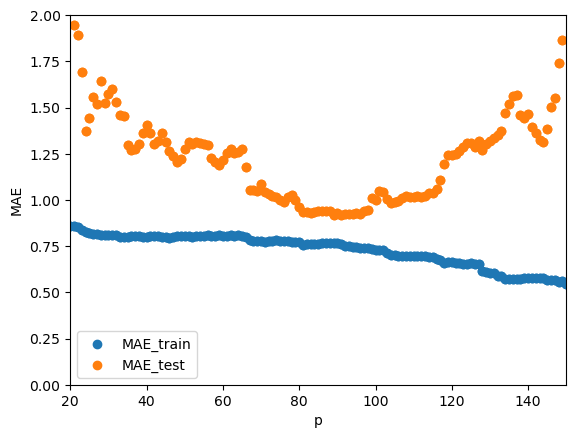

In [22]:
for p in range(1,151):
    if p>=len(train_data):
        continue
    AR_model = AutoReg(train_data, lags=p).fit()
    fit = AR_model.fittedvalues
    MAE_train = MAE(train_data[fit.index], fit)
    pred = AR_model.forecast(len(test_data))
    MAE_test = MAE(test_data, pred)

    p_value.append(p)
    mae_train_list.append(MAE_train)
    mae_test_list.append(MAE_test)

plt.scatter(p_value, mae_train_list, label='MAE_train')
plt.scatter(p_value, mae_test_list, label='MAE_test')
plt.xlabel('p')
plt.ylabel('MAE')
plt.xlim(20,150)
plt.ylim(0,2)
plt.legend()
plt.savefig("PDA_230868_12_1.png")
plt.show()

In [23]:
min_mae_test=min(mae_test_list)
min_p=p_value[mae_test_list.index(min_mae_test)]
print("min MAE_test :", min_mae_test,",p value :", min_p)

min MAE_test : 0.9166086915416874 ,p value : 91
